
# Forecasts and Predictions project

for the gym chain Model Fitness. The goal is to analyze customer churn and formulate a customer retention strategy.


## Content plan


1. [Step1](#Step1) Exploratory data analysis 
2. [Step2](#Step2) Build a model to predict user churn
3. [Step3](#Step3) Create user clusters
 
[Overall conclusion](#oc)


In [1]:
pip install seaborn --upgrade

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.1)
Note: you may need to restart the kernel to use updated packages.


### Step1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

gym = pd.read_csv('/datasets/gym_churn_us.csv')
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


No categorical values and no missing values

In [4]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


The average contract period is 4.5 months, the average lifetime is almost 4 months.

In [5]:
churn_gym=gym.groupby('Churn').mean().reset_index()
churn_gym

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [6]:
churn_gym.round(3)

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,0.510,0.873,0.534,0.354,0.904,5.747,0.464,29.977,158.446,5.283,4.712,2.025,2.028
1,1,0.511,0.768,0.355,0.184,0.903,1.729,0.269,26.990,115.083,1.663,0.991,1.475,1.045


Let's built graphs for categorical variables 

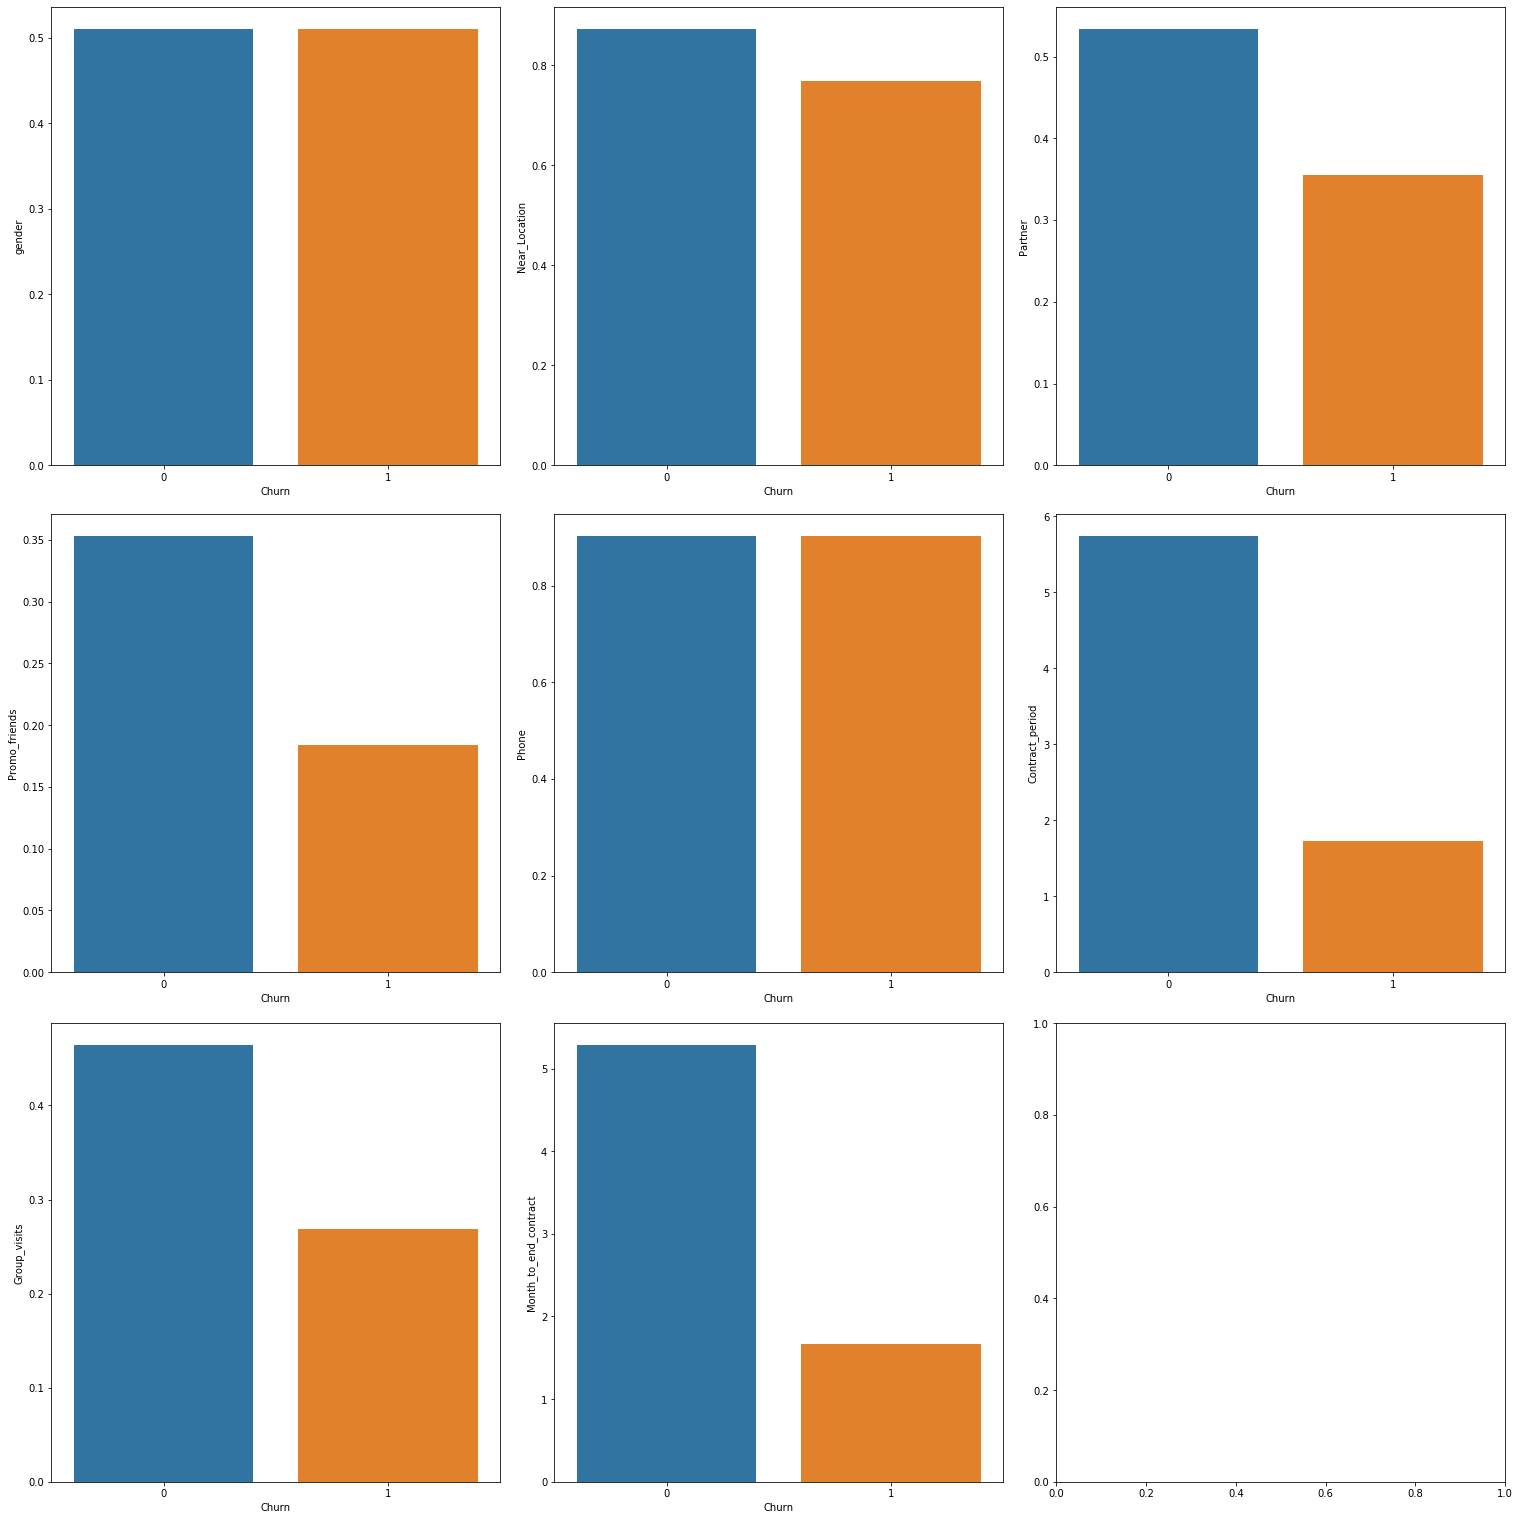

In [7]:
categorical_vars = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits',
                    'Month_to_end_contract']
num_plots = len(categorical_vars)
total_cols = 3
total_rows = num_plots//total_cols+1
fig,axes = plt.subplots(nrows=total_rows, ncols=total_cols, 
                       figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(categorical_vars):
    row=i//total_cols
    pos=i%total_cols
    plot=sns.barplot(x='Churn', y=var, data=churn_gym, ax=axes[row][pos])

Let's plot histograms for numerical variables

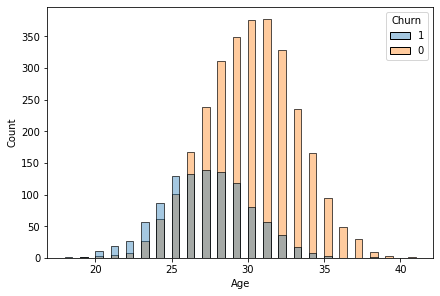

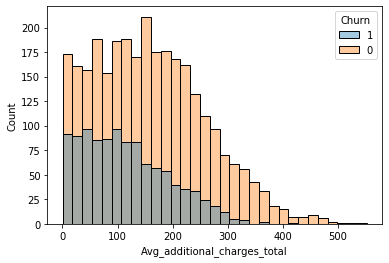

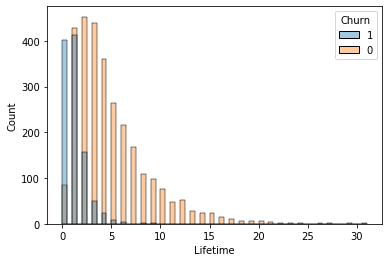

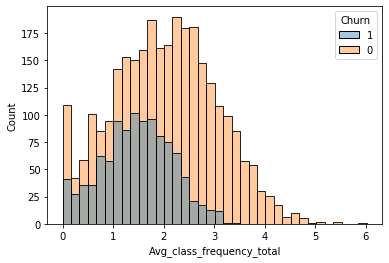

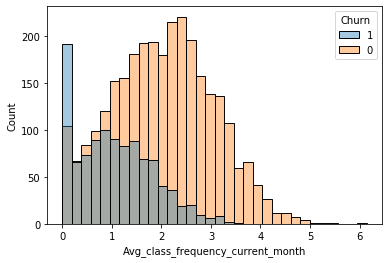

In [8]:
numer_vars = ['Age', 'Avg_additional_charges_total', 'Lifetime', 
              'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

num_plots = len(numer_vars)

fig,axes = plt.subplots(constrained_layout=True)
for i in numer_vars:
    sns.histplot(data=gym, x=i, hue='Churn', hue_order=[1,0], alpha=0.4)
    
    plt.show()
    

As we can see in the graphs, categories such as gender or adding a phone number,  have no effect on whether a person stops attending the club or continues to attend. The closeness to home and the age (the average age of those continuing is higher) is slightly affected. At the same time, the refer a friend promotion and partner programs with employers work well. Also, those who purchase longer subscriptions and attend group classes stay longer.
There are some outlayers, but all the data looks realistic, so I will use them to build the model without removing the outlayers

Calculating and displaying correlation matrix

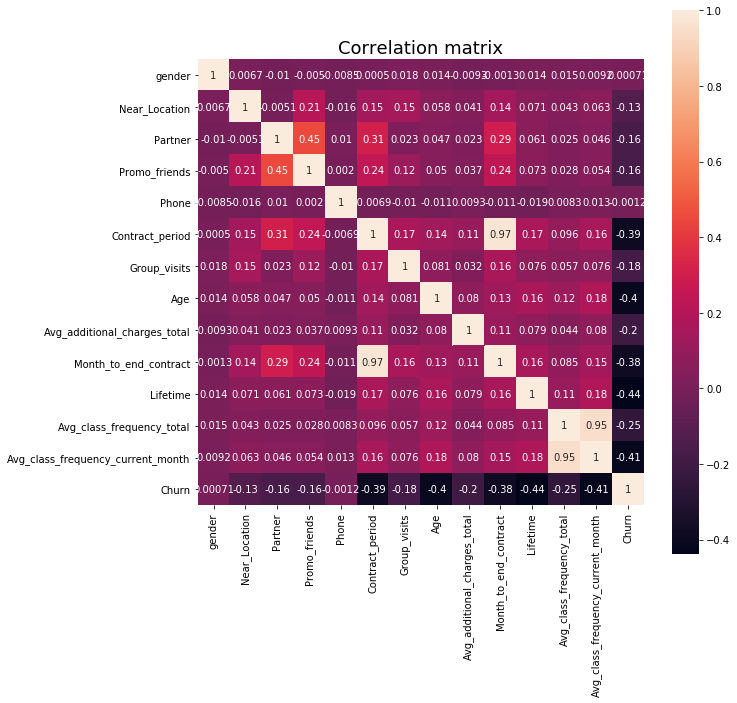

In [9]:
cm = gym.corr() 
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Correlation matrix', fontsize=18)

sns.heatmap(cm, annot = True, square=True)  
plt.show()

We don't see any correlation between features and target variable. But we see high correlation's level between Avg_class_frequency_total and Avg_class_frequency_total. Now it's time to build a model

### Step2

Let's build a binary classification model for customers where the target feature is the user's leaving next month. First we need to divide the data into train and validation sets

In [10]:
X = gym.drop('Churn', axis = 1)
y = gym['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Let's train the model with two methods: logistic regression and random forest. Since the logistic regression  belong to linear models, and linear models required the features to be standardized, i would standardize data first

In [11]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [12]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tBalanced Accuracy: {:.2f}'.format(balanced_accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [13]:
lr_model = LogisticRegression(random_state=0, solver='liblinear')
lr_model.fit( X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
lr=print_all_metrics(y_test, lr_predictions, lr_probabilities, title = 'Logistic regression metrics')
lr

Logistic regression metrics
	Accuracy: 0.92
	Balanced Accuracy: 0.89
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97


In [14]:
rf_model = RandomForestClassifier(random_state=0, n_estimators=100)
rf_model.fit( X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
rf=print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Random forest metrics')
rf

Random forest metrics
	Accuracy: 0.92
	Balanced Accuracy: 0.88
	Precision: 0.84
	Recall: 0.81
	F1: 0.83
	ROC_AUC: 0.97


The indicators of both models are very close to each other, but logistic regression still showed better results, so we choose this model.

### Step3

Let's create user clusters. First we need to build a matrix of distances and plot a dendrogram 

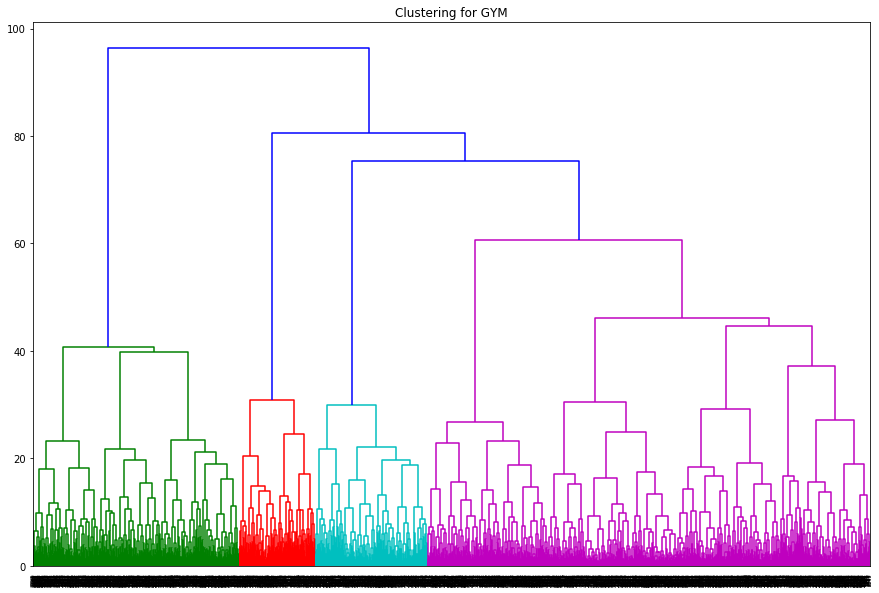

In [15]:
linked = linkage(X_train_st, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Clustering for GYM')
plt.show() 

Based on the graph, we can say that we have 4 main clusters. Nevertheless, based on the task, we will indicate the number of clusters 5 in our model

In [16]:
sc = StandardScaler()
x_sc = sc.fit_transform(gym)

km_model = KMeans(n_clusters = 5, random_state=0)
labels = km_model.fit_predict(x_sc)
gym['cluster_km'] = labels
cluster_gym = gym.groupby(['cluster_km']).mean().reset_index()
cluster_gym

,cluster_km,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.503676,0.000000,0.459559,0.075368,0.917279,2.069853,0.211397,28.522059,132.741216,1.950368,2.757353,1.706629,1.515890,0.450368
1,1,0.492829,0.936115,0.764016,0.534550,0.919166,10.447197,0.516297,29.962190,161.853561,9.477184,4.833116,2.788103,2.786919,0.007823
2,2,0.507917,1.000000,0.323995,0.213155,0.903776,1.546894,0.287454,26.926918,113.173051,1.500609,1.031669,1.449720,1.037592,0.961023
3,3,0.521186,0.996610,0.282203,0.208475,0.904237,1.882203,0.452542,30.237288,157.988625,1.794915,4.923729,2.203432,2.207359,0.003390
4,4,0.518895,0.968023,0.744186,0.526163,0.873547,8.859012,0.534884,29.728198,162.907495,8.155523,4.411337,0.957744,0.943967,0.024709


Clustering supports the original assumption that gender and location have little or no effect on churn. We can say that more loyal customers pay the most money for additional services, their average lifetime is 4-5 months. Also, those who attend group classes stay in the gym longer, as well as those who came on the recommendation of a friend, in two clusters out of three the partnership program had an impact. Younger people stop attending the gym faster.

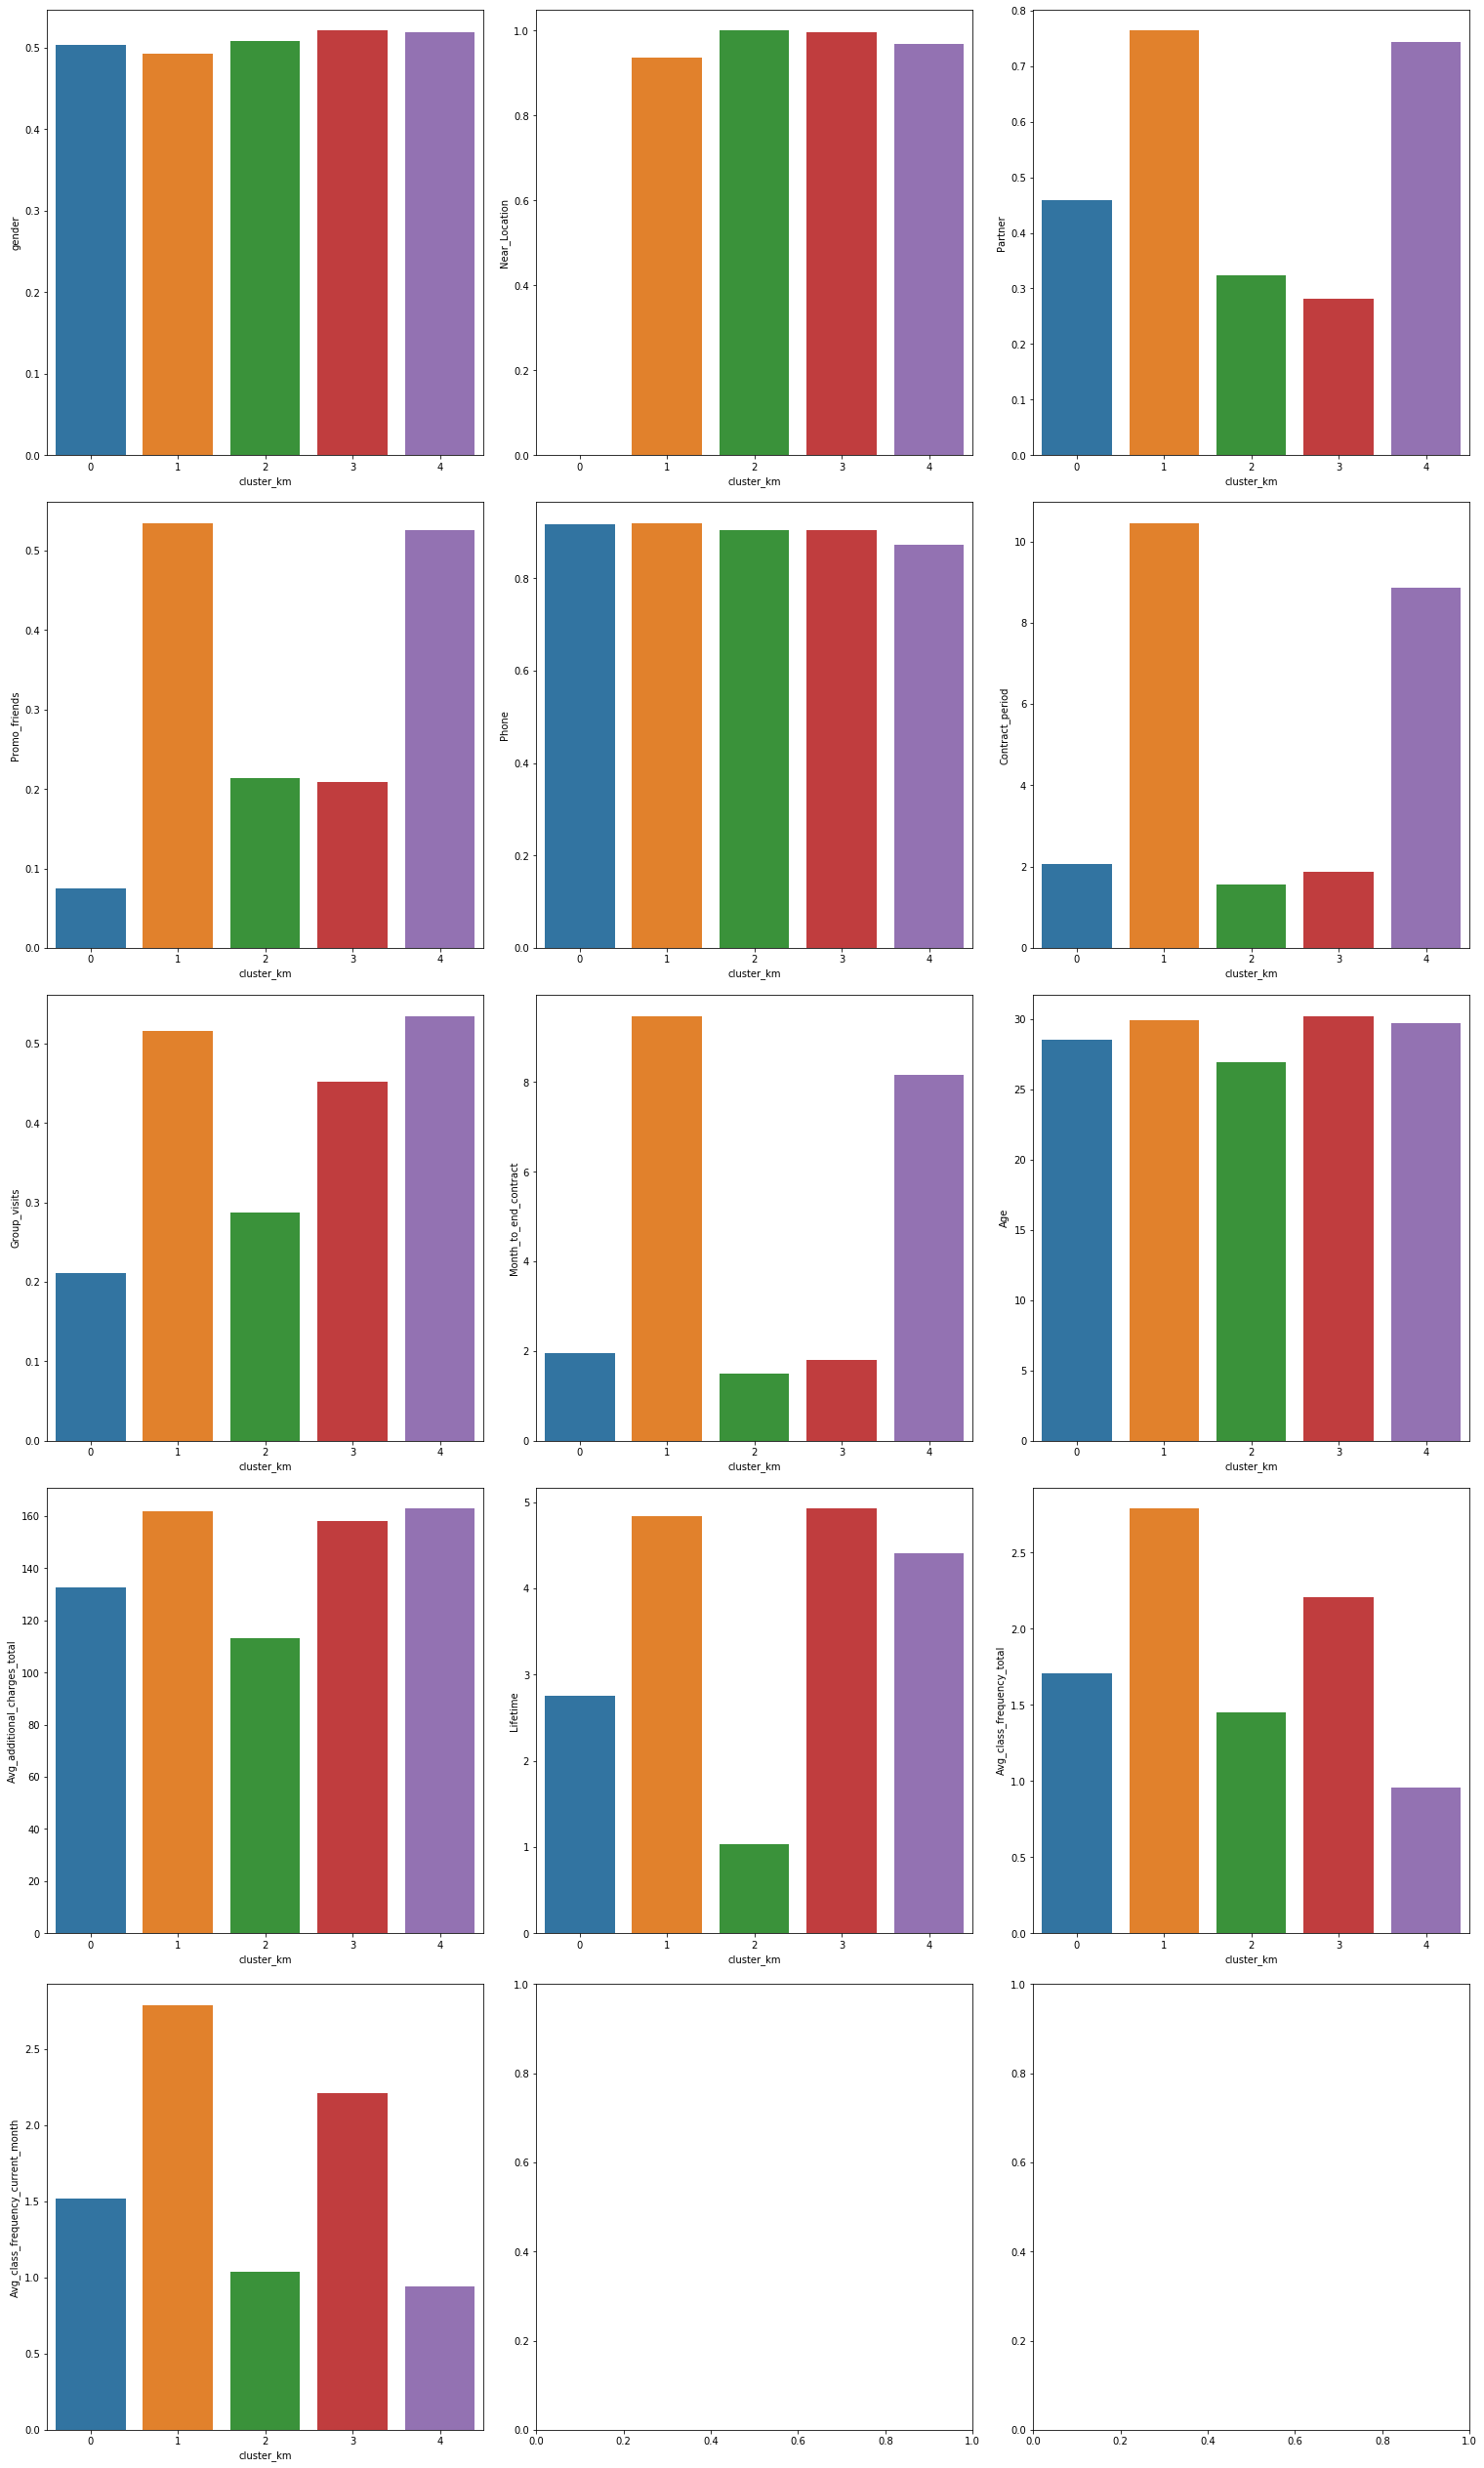

In [17]:
cat_vars = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits',
                    'Month_to_end_contract', 'Age', 'Avg_additional_charges_total', 'Lifetime', 
              'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

num_plots = len(cat_vars)
total_cols = 3
total_rows = num_plots//total_cols+1
fig,axes = plt.subplots(nrows=total_rows, ncols=total_cols, 
                       figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(cat_vars):
    row=i//total_cols
    pos=i%total_cols
    plot=sns.barplot(x='cluster_km', y=var, data=cluster_gym, ax=axes[row][pos])

Cluster0 50/50 male/female, the gym is far from home/work, almost half of members joined the gym by partner's program, less than 10% of members joined the gym after friend's recommendation, average contract period is 2 months, on average 20% of members attended the group classes, up to 30 years old, on average members spent 130$ on additional  services, 2 months until the end of the contract, lifetime 3 months.

Cluster1 49/51 male/female, mostly the gym is near home/work. 3/4 of members joined the gym by partner's program, half of members joined the gym after friend's recommendation, average contract period is 10 months, more than 20% of members attended the group classes, on average 30 years old, on average members spent 160$ on additional  services, 9 months until the end of the contract, lifetime almost 5 months

Cluster2 50/50 male/female, mostly the gym is near home/work, 30% of members joined the gym by partner's program, 20% of members joined the gym after friend's recommendation, average contract period is 1.5 months, almost 30% of members attended the group classes, the youngest group - on average 26 years old, on average members spent 110$ on additional  services, 1.5 months until the end of the contract, lifetime 1 month

Cluster3 52/48 male/female, mostly the gym is near home/work, 30% of members joined the gym by partner's program, 20% пof members joined the gym after friend's recommendation, average contract period is 1.5 months, on average 45% of members attended the group classes, over 30 years old, on average members spent 160$ on additional  services, 1.5-2 months until the end of the contract, lifetime almost 5 months

Cluster4 51/49 male/female, mostly the gym is near home/work, 3/4 of members joined the gym by partner's program, half of members joined the gym after friend's recommendation, average contract period is 8-9 months, more than 50% of members attended the group classes, on average 30 years old, on average members spent 165$ on additional  services, 8 months until the end of the contract, lifetime 4.5 months

In [18]:
churn_rate=gym.groupby('cluster_km')['Churn'].mean()*100
churn_rate

cluster_km
0    45.036765
1     0.782269
2    96.102314
3     0.338983
4     2.470930
Name: Churn, dtype: float64

We can say that visitors from the second cluster with a probability of 96% will leave next month, from cluster 0 - this probability is 45%. Clients from clusters 1, 3, 4 are likely to continue training.

<a id="oc"></a>

## Overall conclusion

Conclusions:

- gender and location have almost no effect on churn.
- more loyal customers pay the most money for additional services.
- those who attend group classes stay in the gym longer, as well as those who came on the recommendation of a friend, in two clusters out of three the partnership program had an impact.
- Younger people stop attending the gym faster
- visitors from the second cluster with a probability of 96% will leave next month, from cluster 0 - this probability is 45%. Clients from clusters 1, 3, 4 are likely to continue training.

Recommendations:

- develop affiliate programs and encourage clients to recommend the club to their friends
- attract clients to group classes
- attract customers aged 30+
- add a variety of additional services so that people feel even more comfortable and can solve more additional requests without leaving the club, for example, a barbershop for men and hairdressing services for women.